In [1]:
import random
import torch
import math
import os
import pandas as pd
import numpy as np
import matplotlib_inline

In [2]:
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.2261,  0.0812]) 
label: tensor([1.4706])


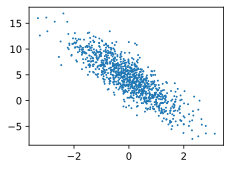

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10

In [9]:
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.8385, -2.1932],
        [-0.2005,  0.3654],
        [-0.0544, -0.9383],
        [ 1.2379, -0.6396],
        [ 0.1536,  0.0073],
        [ 1.3729,  0.2720],
        [ 2.3666,  0.9291],
        [ 0.8830,  0.5987],
        [ 0.7085, -0.3468],
        [-0.5108,  0.8044]]) 
 tensor([[9.9763],
        [2.5360],
        [7.2860],
        [8.8483],
        [4.4897],
        [6.0041],
        [5.7792],
        [3.9365],
        [6.7778],
        [0.4666]])


In [10]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [11]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [12]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [15]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033773
epoch 2, loss 0.000121
epoch 3, loss 0.000049


In [16]:
print(f'error in eatimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in eatimating b: {true_b - b}')

error in eatimating w: tensor([-0.0005, -0.0006], grad_fn=<SubBackward0>)
error in eatimating b: tensor([0.0008], grad_fn=<RsubBackward1>)
